# Cross Validation and Grid Search

## Cross Validation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=42)

In [5]:
# Build the model
logreg = LogisticRegression()
knn = KNeighborsClassifier()

By default, `cross_val_score(model, data, labels)` performs 5-fold cross-validation, returning 5 accuracy values. If we want to adjust cv folds, we can set `cv=n` in `cross_val_score` function.

In [6]:
scores_logreg = cross_val_score(logreg, X_train, y_train)
scores_knn = cross_val_score(knn, X_train, y_train)

print(f"Cross-validation scores for logistic regression: {scores_logreg}")
print(f"Cross-validation scores for knn: {scores_knn}")

Cross-validation scores for logistic regression: [1.         1.         0.86363636 1.         0.95454545]
Cross-validation scores for knn: [0.95652174 1.         0.81818182 1.         0.95454545]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Calculate each average cv scores

In [17]:
print("Average cv scores for logistic regression: {:.2f}".format(scores_logreg.mean()))
print("Average cv scores for knn: {:.2f}".format(scores_knn.mean()) )

Average cv scores for logistic regression: 0.96
Average cv scores for knn: 0.95


### Use KFlod

In [21]:
kf = KFold(n_splits=6)

print(f"Cross-validation scores for logistic regression: {cross_val_score(logreg, X_train, y_train, cv=kf)}")

Cross-validation scores for logistic regression: [1.         1.         0.84210526 1.         1.         0.94444444]


### Use shuffle-split cross-validation

Control split size and also define times if iteration

In [22]:
import mglearn

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


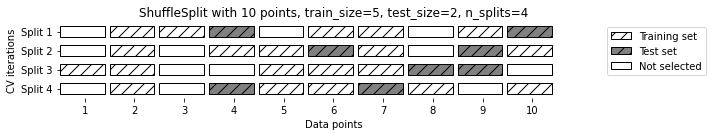

In [23]:
mglearn.plots.plot_shuffle_split()

In [24]:
from sklearn.model_selection import ShuffleSplit
shuffle = ShuffleSplit(test_size=0.2, train_size=0.6, n_splits=10)
shuffled_scores = cross_val_score(logreg, X_train, y_train, cv=shuffle)
print(f"Cross validation scorss with shuffle split: {shuffled_scores}")

Cross validation scorss with shuffle split: [0.95652174 0.91304348 0.91304348 1.         0.95652174 0.95652174
 0.82608696 0.95652174 0.91304348 0.86956522]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

## Grid Search

Finding the hyperparameters that can best improve model's performance.

In [27]:
# Simple grid search
from sklearn.svm import SVC

print(f"Size of traing datasets: {X_train.shape}, size of test dataset: {X_test.shape}")

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train a SVC model
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate
        score = svm.score(X_test, y_test)
      
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

print("Best score: {:2f}".format(best_score))
print("Best parameters combination: {}".format(best_parameters))

Size of traing datasets: (112, 4), size of test dataset: (38, 4)
Best score: 1.000000
Best parameters combination: {'C': 100, 'gamma': 0.001}


### Grid search with cross validation

Firstly, we need to create parameter gird so that `GridSearchCV` can train the model with various combinations of parameters and find the best combination.

Then, we fit the model with `GridSearchCV(...).fit()`. Fitting the `GridSearchCV` object not only searches for the best parameters, but also automatically fits a new model on the whole training dataset with the best parameters that yielded the best cv score.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n {}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

grid_search.fit(X_train, y_train)

gs_scores = grid_search.score(X_test, y_test)
print("Test score with best params: {}".format(gs_scores))

Parameter grid:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Test score with best params: 1.0


In [30]:
print("Best params: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:2f}".format(grid_search.best_score_))

Best params: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.972727
